## The Evolution of Data Science and AI

The transformation of artificial intelligence and data science from theoretical foundations to generative AI represents one of the most significant technological revolutions in modern history. Five distinct phases have defined this evolution, each marked by breakthrough algorithmic innovations and enabling computational infrastructure that laid the groundwork for today's AI capabilities. This journey spans from the 1940s statistical foundations and early cybernetics through the current era of large language models and multimodal AI systems that can reason, create, and interact with human-like sophistication.

The evolution reveals a fascinating interplay between theoretical breakthroughs and practical engineering solutions, where each era's computational constraints drove algorithmic innovation, while new algorithms demanded more powerful infrastructure. From Fisher's statistical methods running on mechanical calculators to trillion-parameter transformers distributed across thousands of specialized AI chips, this progression shows how fundamental mathematical principles scaled through increasingly sophisticated computational architectures to enable capabilities that seemed impossible just decades ago.

### Phase 1: Teaching Machines to Calculate (1940s-1970s)

The foundational period from the 1940s through 1970s established the mathematical and computational frameworks that underpin all modern data science and AI systems. This era was distinguished by unprecedented interdisciplinary collaboration between mathematicians, statisticians, engineers, and biologists, creating entirely new fields like cybernetics and information theory.

Some notable contributions are: 

**Ronald Fisher's revolutionary statistical framework** became the foundation for modern data analysis, introducing maximum likelihood estimation (what we use to fit the line to the data in examples above), analysis of variance (ANOVA), and experimental design principles still used in today's A/B testing. The Neyman-Pearson hypothesis testing framework provided the theoretical foundation for decision-making under uncertainty, directly influencing early AI decision systems (see example below that leverages this framework). You might be familiar with the t-test, which fits within this framework. These mathematical principles established the statistical rigor that would become essential for validating modern machine learning algorithms.

**The McCulloch-Pitts neuron model (1943)** provided the first mathematical framework for neural networks, demonstrating that networks of simple binary neurons could perform any logical computation. This work proved the Turing completeness of neural networks and established the theoretical foundation for modern artificial neural networks. Donald Hebb's learning principle - "neurons that fire together, wire together" - provided the biological inspiration for synaptic plasticity that influences contemporary deep learning architectures.

**Information theory** emerged as a cornerstone through Claude Shannon's 1948 "Mathematical Theory of Communication," which quantified information content and introduced entropy as a fundamental concept. Shannon discovered that information could be measured mathematically - a surprising message contains more information than a predictable one. He defined entropy as the average amount of surprise or uncertainty in a message. High entropy means the message is unpredictable (like a random password), while low entropy means it's predictable (like a string of repeated letters). This insight revolutionized how we compress files, transmit data, and even how AI systems learn patterns. Shannon's work converged remarkably with Norbert Wiener's cybernetics, creating the theoretical foundation for pattern recognition and adaptive systems. The mathematical formulations they developed independently became the basis for modern machine learning optimization and neural network training.


### Example: Quality Control Using Statistical Testing

A factory tests if their machines are producing items at the correct weight. Standard weight should be 100 grams. Natural variation is normal and expected.

In [3]:

import numpy as np
import matplotlib.pyplot as plt


np.random.seed(42)

# Machine A: Working correctly (average ~100g)
machine_a_products = np.random.normal(100, 3, 50)  # 50 products

# Machine B: Problem machine (average ~97g) 
machine_b_products = np.random.normal(98, 3, 50)   # 50 products


print("machine A products: ", machine_a_products[:10])
print("machine B products: ", machine_b_products[:10])


machine A products:  [101.49014246  99.5852071  101.94306561 104.56908957  99.29753988
  99.29758913 104.73763845 102.30230419  98.59157684 101.62768013]
machine B products:  [ 98.97225191  96.84475316  95.969234    99.83502887 101.09299857
 100.79384036  95.48234743  97.07236287  98.99379029 100.92663538]


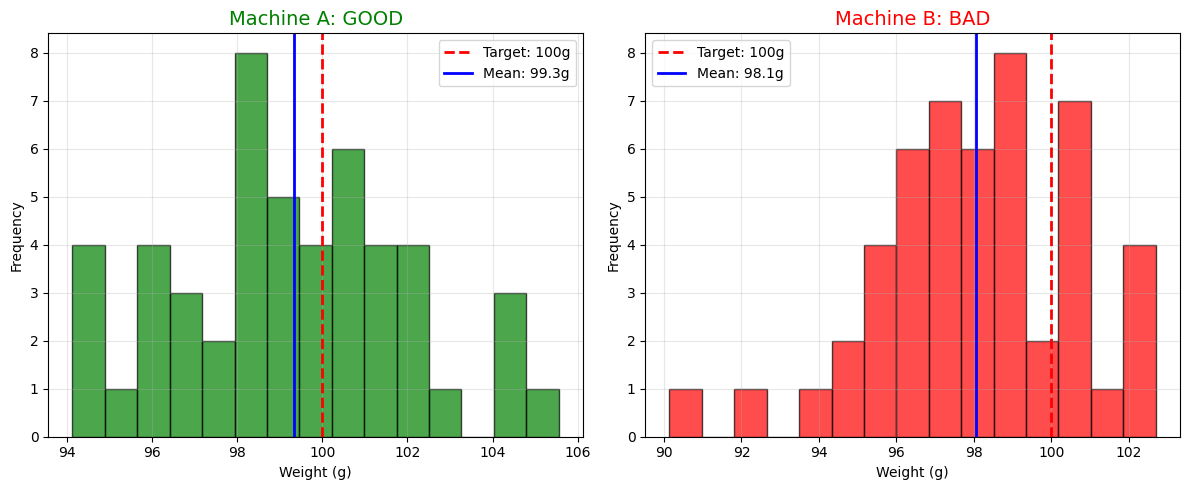

HYPOTHESIS TEST RESULTS:
H0: Both machines have same mean weight
H1: Machines have different mean weights
t-statistic: 2.341
p-value: 0.021278
Result: REJECT H0 (α = 0.05)
Conclusion: Machines are SIGNIFICANTLY DIFFERENT
CONFIDENCE INTERVALS (95%):
Machine A: [98.5g, 100.1g]
Machine B: [97.3g, 98.8g]
Target (100g) in A's CI: YES
Target (100g) in B's CI: NO
SUMMARY:
Machine A: Mean = 99.3g, Std = 2.8g - GOOD ✓
Machine B: Mean = 98.1g, Std = 2.6g - BAD ✗
Difference: 1.3g


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

np.random.seed(42)
# Machine A: Working correctly (average ~100g)
machine_a_products = np.random.normal(100, 3, 50)
# Machine B: Problem machine (average ~97g) 
machine_b_products = np.random.normal(98, 3, 50)

# Create comparison plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Machine A
ax1.hist(machine_a_products, bins=15, alpha=0.7, color='green', edgecolor='black')
ax1.axvline(100, color='red', linestyle='--', linewidth=2, label='Target: 100g')
ax1.axvline(np.mean(machine_a_products), color='blue', linewidth=2, label=f'Mean: {np.mean(machine_a_products):.1f}g')
ax1.set_title('Machine A: GOOD', fontsize=14, color='green')
ax1.set_xlabel('Weight (g)')
ax1.set_ylabel('Frequency')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Machine B
ax2.hist(machine_b_products, bins=15, alpha=0.7, color='red', edgecolor='black')
ax2.axvline(100, color='red', linestyle='--', linewidth=2, label='Target: 100g')
ax2.axvline(np.mean(machine_b_products), color='blue', linewidth=2, label=f'Mean: {np.mean(machine_b_products):.1f}g')
ax2.set_title('Machine B: BAD', fontsize=14, color='red')
ax2.set_xlabel('Weight (g)')
ax2.set_ylabel('Frequency')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Hypothesis Test: Are the machines significantly different?
t_stat, p_value = stats.ttest_ind(machine_a_products, machine_b_products)

# Confidence intervals (95%)
def confidence_interval(data, confidence=0.95):
    mean = np.mean(data)
    se = stats.sem(data)  # Standard error
    h = se * stats.t.ppf((1 + confidence) / 2., len(data)-1)
    return mean - h, mean + h

ci_a = confidence_interval(machine_a_products)
ci_b = confidence_interval(machine_b_products)

print("="*50)
print("HYPOTHESIS TEST RESULTS:")
print(f"H0: Both machines have same mean weight")
print(f"H1: Machines have different mean weights")
print(f"t-statistic: {t_stat:.3f}")
print(f"p-value: {p_value:.6f}")
print(f"Result: {'REJECT H0' if p_value < 0.05 else 'FAIL TO REJECT H0'} (α = 0.05)")
print(f"Conclusion: Machines are {'SIGNIFICANTLY DIFFERENT' if p_value < 0.05 else 'NOT SIGNIFICANTLY DIFFERENT'}")
print("="*50)

print("CONFIDENCE INTERVALS (95%):")
print(f"Machine A: [{ci_a[0]:.1f}g, {ci_a[1]:.1f}g]")
print(f"Machine B: [{ci_b[0]:.1f}g, {ci_b[1]:.1f}g]")
print(f"Target (100g) in A's CI: {'YES' if ci_a[0] <= 100 <= ci_a[1] else 'NO'}")
print(f"Target (100g) in B's CI: {'YES' if ci_b[0] <= 100 <= ci_b[1] else 'NO'}")
print("="*50)

# Summary stats
print("SUMMARY:")
print(f"Machine A: Mean = {np.mean(machine_a_products):.1f}g, Std = {np.std(machine_a_products):.1f}g - GOOD ✓")
print(f"Machine B: Mean = {np.mean(machine_b_products):.1f}g, Std = {np.std(machine_b_products):.1f}g - BAD ✗")
print(f"Difference: {np.mean(machine_a_products) - np.mean(machine_b_products):.1f}g")

## Perplexity and Entropy: Two Ways to Measure AI's Confusion

**Perplexity is directly connected to entropy - it's entropy expressed in a more intuitive way.** Shannon's entropy tells us the average "bits of surprise" in information. Perplexity converts this to something easier to understand: how many choices the AI feels like it has. The mathematical relationship is simple: **Perplexity = 2^Entropy**. 

If entropy is 3 bits, perplexity is 2³ = 8, meaning the AI is as confused as if it were choosing randomly between 8 equally likely options. This is why we use perplexity to evaluate language models like ChatGPT - it tells us in plain numbers how many words the AI is uncertain between when predicting the next word.



HOW AI PREDICTS THE NEXT WORD: ENTROPY vs PERPLEXITY

1. CONFIDENT AI - Predicting next word after 'Happy Birthday to...'
   AI's prediction: 'you' (95% confident)
   Entropy: 0.36 bits
   Perplexity: 1.29 (feels like choosing between ~1 option)

2. UNCERTAIN AI - Predicting next word after 'The weather is...'
   AI is unsure between multiple options
   Entropy: 2.42 bits
   Perplexity: 5.36 (feels like choosing between ~5 options)

3. CONFUSED AI - Predicting next word after 'Xqwz vplm qrst...'
   AI has no idea what comes next (gibberish input)
   Entropy: 6.84 bits
   Perplexity: 114.82 (feels like choosing between ~115 options!)


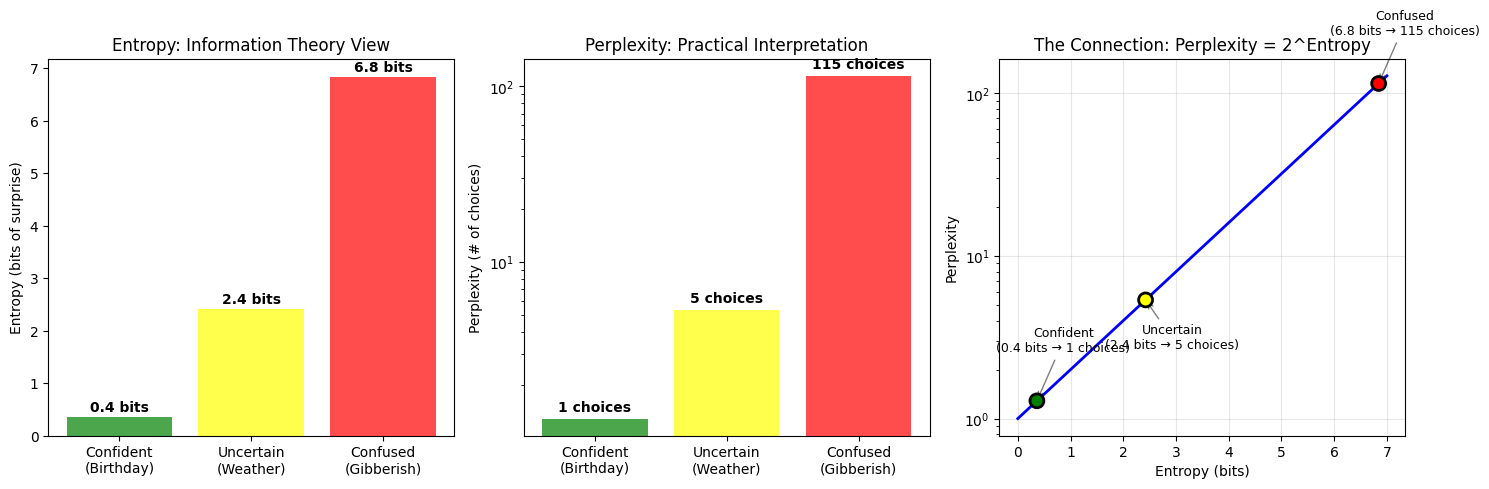


EVALUATING REAL AI MODELS:

Model Performance on Typical English Text:
----------------------------------------------------------------------

GPT-2 (2019):
  Entropy: 3.5 bits → Perplexity: 11.3
  Interpretation: Choosing between ~11 words
  Quality: Good but often wrong

GPT-3 (2020):
  Entropy: 2.8 bits → Perplexity: 7.0
  Interpretation: Choosing between ~7 words
  Quality: Much better understanding

GPT-4 (2023):
  Entropy: 2.0 bits → Perplexity: 4.0
  Interpretation: Choosing between ~4 words
  Quality: Near-human understanding

Perfect AI:
  Entropy: 0.0 bits → Perplexity: 1.0
  Interpretation: Choosing between ~1 words
  Quality: Knows exactly what comes next

Random Guessing:
  Entropy: 10.0 bits → Perplexity: 1024.0
  Interpretation: Choosing between ~1024 words
  Quality: No understanding at all

KEY INSIGHT FOR AI:

Why this matters for ChatGPT and other AI:
• Lower perplexity = Better language understanding
• Perplexity of 8 = As confused as choosing between 8 random word

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import math

def calculate_entropy_and_perplexity(probabilities):
    """
    Calculate both entropy and perplexity to show their relationship
    Perplexity = 2^Entropy (always!)
    """
    # Calculate entropy: -sum(p * log2(p))
    entropy = 0
    for p in probabilities.values():
        if p > 0:
            entropy -= p * math.log2(p)
    
    # Perplexity is 2^entropy
    perplexity = 2 ** entropy
    
    return entropy, perplexity

print("\n" + "="*70)
print("HOW AI PREDICTS THE NEXT WORD: ENTROPY vs PERPLEXITY")
print("="*70)

# Scenario 1: AI is very confident (knows what comes next)
print("\n1. CONFIDENT AI - Predicting next word after 'Happy Birthday to...'")
confident_prediction = {
    'you': 0.95,      # AI is 95% sure it's 'you'
    'me': 0.02,
    'everyone': 0.02,
    'other': 0.01
}
entropy1, perplexity1 = calculate_entropy_and_perplexity(confident_prediction)
print(f"   AI's prediction: 'you' (95% confident)")
print(f"   Entropy: {entropy1:.2f} bits")
print(f"   Perplexity: {perplexity1:.2f} (feels like choosing between ~{perplexity1:.0f} option)")

# Scenario 2: AI is somewhat uncertain
print("\n2. UNCERTAIN AI - Predicting next word after 'The weather is...'")
uncertain_prediction = {
    'nice': 0.25,
    'good': 0.25,
    'beautiful': 0.20,
    'sunny': 0.15,
    'cold': 0.10,
    'other': 0.05
}
entropy2, perplexity2 = calculate_entropy_and_perplexity(uncertain_prediction)
print(f"   AI is unsure between multiple options")
print(f"   Entropy: {entropy2:.2f} bits")
print(f"   Perplexity: {perplexity2:.2f} (feels like choosing between ~{perplexity2:.0f} options)")

# Scenario 3: AI is completely confused (random text)
print("\n3. CONFUSED AI - Predicting next word after 'Xqwz vplm qrst...'")
confused_prediction = {word: 0.01 for word in ['the', 'a', 'is', 'to', 'of', 'and', 'in', 'that', 'it', 'for',
                                                 'was', 'with', 'as', 'on', 'at', 'by', 'from', 'but', 'not', 'or',
                                                 'an', 'be', 'this', 'which', 'can', 'had', 'have', 'were', 'been', 'their',
                                                 'are', 'all', 'would', 'will', 'there', 'been', 'one', 'if', 'more', 'when',
                                                 'what', 'out', 'up', 'about', 'who', 'them', 'than', 'some', 'time', 'very',
                                                 'upon', 'may', 'its', 'only', 'now', 'like', 'little', 'then', 'into', 'such',
                                                 'much', 'also', 'well', 'must', 'way', 'before', 'through', 'back', 'still', 'where',
                                                 'most', 'after', 'should', 'over', 'why', 'did', 'many', 'those', 'being', 'whom',
                                                 'same', 'two', 'may', 'see', 'made', 'between', 'each', 'under', 'how', 'come',
                                                 'never', 'place', 'take', 'because', 'too', 'himself', 'work', 'year', 'while', 'last',
                                                 'might', 'great', 'old', 'tell', 'again']}
entropy3, perplexity3 = calculate_entropy_and_perplexity(confused_prediction)
print(f"   AI has no idea what comes next (gibberish input)")
print(f"   Entropy: {entropy3:.2f} bits")
print(f"   Perplexity: {perplexity3:.2f} (feels like choosing between ~{perplexity3:.0f} options!)")

# Visualization
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

# Show the mathematical relationship
scenarios = ['Confident\n(Birthday)', 'Uncertain\n(Weather)', 'Confused\n(Gibberish)']
entropies = [entropy1, entropy2, entropy3]
perplexities = [perplexity1, perplexity2, perplexity3]
colors = ['green', 'yellow', 'red']

# Entropy bars
bars1 = ax1.bar(scenarios, entropies, color=colors, alpha=0.7)
ax1.set_ylabel('Entropy (bits of surprise)')
ax1.set_title('Entropy: Information Theory View')
for bar, val in zip(bars1, entropies):
    ax1.text(bar.get_x() + bar.get_width()/2., bar.get_height() + 0.1,
            f'{val:.1f} bits', ha='center', fontweight='bold')

# Perplexity bars
bars2 = ax2.bar(scenarios, perplexities, color=colors, alpha=0.7)
ax2.set_ylabel('Perplexity (# of choices)')
ax2.set_title('Perplexity: Practical Interpretation')
ax2.set_yscale('log')
for bar, val in zip(bars2, perplexities):
    ax2.text(bar.get_x() + bar.get_width()/2., bar.get_height() * 1.1,
            f'{val:.0f} choices', ha='center', fontweight='bold')

# Show the relationship: Perplexity = 2^Entropy
entropy_range = np.linspace(0, 7, 100)
perplexity_range = 2 ** entropy_range

ax3.plot(entropy_range, perplexity_range, 'b-', linewidth=2)
ax3.scatter(entropies, perplexities, c=colors, s=100, edgecolors='black', linewidth=2, zorder=5)
ax3.set_xlabel('Entropy (bits)')
ax3.set_ylabel('Perplexity')
ax3.set_title('The Connection: Perplexity = 2^Entropy')
ax3.set_yscale('log')
ax3.grid(True, alpha=0.3)

# Annotate points
for i, (ent, perp, scenario) in enumerate(zip(entropies, perplexities, ['Confident', 'Uncertain', 'Confused'])):
    ax3.annotate(f'{scenario}\n({ent:.1f} bits → {perp:.0f} choices)',
                xy=(ent, perp), xytext=(ent + 0.5, perp * (2 if i != 1 else 0.5)),
                arrowprops=dict(arrowstyle='->', alpha=0.5),
                fontsize=9, ha='center')

plt.tight_layout()
plt.show()

# Real-world model comparison
print("\n" + "="*70)
print("EVALUATING REAL AI MODELS:")
print("="*70)

models = [
    ("GPT-2 (2019)", 3.5, "Good but often wrong"),
    ("GPT-3 (2020)", 2.8, "Much better understanding"),  
    ("GPT-4 (2023)", 2.0, "Near-human understanding"),
    ("Perfect AI", 0.0, "Knows exactly what comes next"),
    ("Random Guessing", 10.0, "No understanding at all")
]

print("\nModel Performance on Typical English Text:")
print("-"*70)
for model, entropy, description in models:
    perplexity = 2 ** entropy
    print(f"\n{model}:")
    print(f"  Entropy: {entropy:.1f} bits → Perplexity: {perplexity:.1f}")
    print(f"  Interpretation: Choosing between ~{perplexity:.0f} words")
    print(f"  Quality: {description}")

print("\n" + "="*70)
print("KEY INSIGHT FOR AI:")
print("="*70)
print("\nWhy this matters for ChatGPT and other AI:")
print("• Lower perplexity = Better language understanding")
print("• Perplexity of 8 = As confused as choosing between 8 random words")
print("• Perplexity of 100 = As confused as choosing between 100 random words")
print("• Shannon's 1948 entropy formula still measures AI performance today!")
print("="*70)


### Phase 2: Expert Systems and Learning Algorithms (1980s-2000s)

### Machines That Follow Rules and Learn Patterns

The second phase created two important developments: expert systems that could follow human rules, and algorithms that could learn patterns from examples. Companies built systems that could diagnose diseases or configure computers by following thousands of if-then rules written by experts.

Symbolic AI tried to represent human knowledge using symbols and rules - like teaching a computer to think using words and logic rather than numbers. Instead of calculating statistics, symbolic AI used IF-THEN rules that mimicked human reasoning. For example: IF patient has fever AND cough AND fatigue THEN possibly flu (confidence: 75%). This approach assumed that intelligence meant manipulating symbols the way humans manipulate words and concepts.

**Expert systems dominated early 1980s AI development**, using rule-based reasoning with knowledge bases containing thousands of if-then production rules. Systems like MYCIN achieved 69% accuracy in medical diagnosis, matching human experts.

**How expert systems worked:** Knowledge was encoded as hundreds of rules. MYCIN would ask questions like "Does the patient have a fever?" then "Is the fever above 38.5°C?" Each answer would trigger new rules, narrowing down possible diagnoses. For example:
- Rule 1: IF fever > 38.5°C AND white blood cell count > 12,000 THEN bacterial infection (confidence: 0.8)
- Rule 2: IF bacterial infection AND patient is hospitalized THEN recommend antibiotics (confidence: 0.9)
- The system would chain these rules together, calculating overall confidence scores to reach conclusions

These systems introduced the crucial separation between knowledge base (the rules) and inference engine (the program that applies rules). However, they revealed fundamental limitations: **brittleness** meant they failed completely with unexpected inputs - ask about a disease not in their rules and they had no answer. The **knowledge acquisition bottleneck** meant extracting rules from human experts took years - imagine interviewing doctors to write down every single decision rule they use.

**A major shift occurred from symbolic to statistical learning.** Support Vector Machines (SVMs) and ensemble methods changed how machines learned. Instead of writing rules, SVMs found the best way to draw boundaries between different categories of data. Imagine sorting emails into spam vs legitimate - SVMs would find the optimal dividing line in a space where each word is a dimension.

**Ensemble methods used "wisdom of crowds" for machines.** Random Forests (1996) created hundreds of different decision trees, each looking at random subsets of data, then averaged their "votes" for the final answer - like asking 100 doctors for opinions and taking the majority view. AdaBoost went further by training new models to focus on examples the previous models got wrong, like a student studying harder on topics they failed before.

**Computational infrastructure evolved** from room-sized mainframes to desktop computers. The IBM PC (1981) meant researchers could experiment at home. "3M machines" (1 megapixel display, 1 megabyte RAM, 1 MIPS processor) provided enough power to train small neural networks - though training could still take days. Programming languages like LISP let researchers write "IF patient-symptom = fever THEN check-infection" naturally, while C enabled the fast number-crunching needed for neural networks.

**Business impact:** American Express saved $27 million annually by automating credit decisions - their system could evaluate applications in seconds instead of days. MYCIN diagnosed blood infections as accurately as specialist doctors. Email providers achieved 95% spam detection rates by 2000, learning from millions of examples rather than hand-written rules.

The emergence of relational databases (Oracle, DB2) meant companies could store millions of customer records for machine learning. Early parallel computers like the Connection Machine showed that dividing work across processors could speed up training. Silicon Graphics workstations enabled the first real-time computer vision - though "real-time" meant processing one image per second.

**Key innovation:** The backpropagation algorithm (1986) by Rumelhart, Hinton, and Williams - a method that let computers learn by adjusting their mistakes, similar to how humans learn from errors. This made it possible to train "neural networks" with multiple layers. The algorithm worked by calculating how wrong each prediction was, then adjusting the network's internal numbers to reduce that error, repeating thousands of times until the network learned patterns.




In [16]:
### Python Example: Learning from Examples (Classification)



EVOLUTION FROM EXPERT SYSTEMS TO MACHINE LEARNING

1. EXPERT SYSTEM APPROACH (1980s): Using Hand-Written Rules
----------------------------------------------------------------------

Patient 1: Fever=39.2°C, Cough=True
  Diagnosis: FLU (confidence: 100.0%)
    → Rule 1: High fever + cough → possible infection
    → Rule 2: Fatigue + body aches → possible flu
    → Rule 3: High fever + aches + cough → likely flu

Patient 2: Fever=37.5°C, Cough=True
  Diagnosis: HEALTHY (confidence: 0.0%)

Patient 3: Fever=36.8°C, Cough=False
  Diagnosis: HEALTHY (confidence: 0.0%)


2. MACHINE LEARNING APPROACH (1990s): Learning from Examples
----------------------------------------------------------------------

Trained on 799 patient examples
Single Decision Tree accuracy: 89.0%
Random Forest (100 trees) accuracy: 88.0%

Why Random Forest is better: Like asking 100 doctors instead of 1!


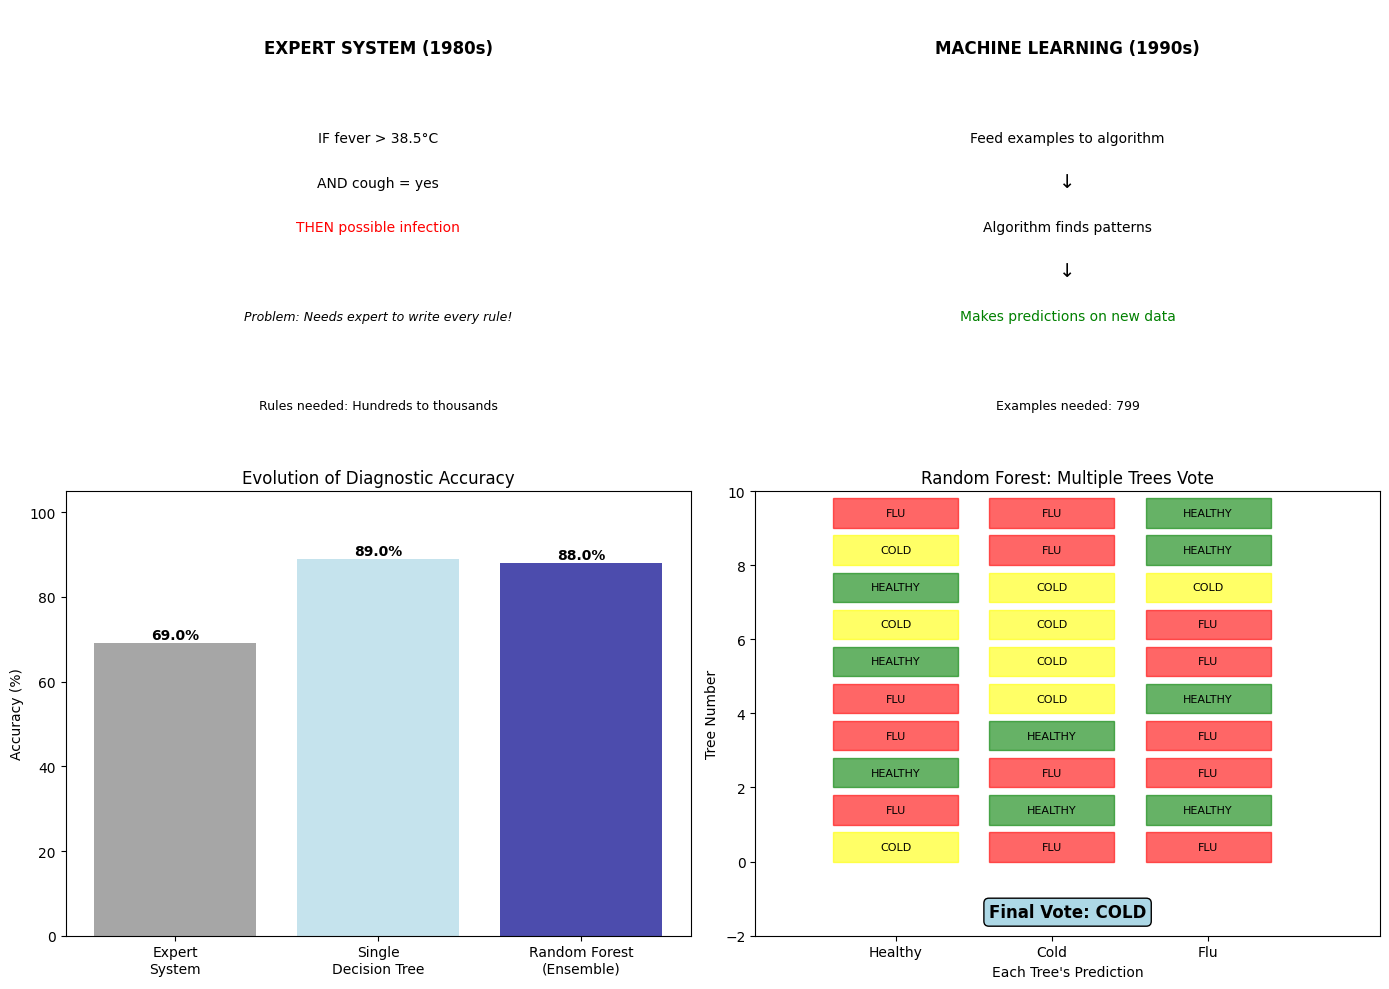


KEY INSIGHT: From Rules to Learning
• 1980s: Humans write rules → Computer follows
• 1990s: Humans provide examples → Computer learns patterns
• Result: More accurate, easier to build, adapts to new data


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

# Create sample customer data for loan approval
# Features: Income (thousands), Credit Score
n_customers = 200

# Generate approved loans (higher income and credit)
approved_income = np.random.normal(75, 20, n_customers//2)
approved_credit = np.random.normal(720, 50, n_customers//2)
approved_credit = np.clip(approved_credit, 300, 850)

# Generate rejected loans (lower income and credit)
rejected_income = np.random.normal(40, 15, n_customers//2)
rejected_credit = np.random.normal(620, 60, n_customers//2)
rejected_credit = np.clip(rejected_credit, 300, 850)

# Combine data
X = np.vstack([
    np.column_stack([approved_income, approved_credit]),
    np.column_stack([rejected_income, rejected_credit])
])
y = np.array([1] * (n_customers//2) + [0] * (n_customers//2))  # 1=approved, 0=rejected

# Train a simple decision system
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
classifier = DecisionTreeClassifier(max_depth=3, random_state=42)
classifier.fit(X_train, y_train)

# Test with new customers
new_customers = np.array([
    [85, 750],  # High income, high credit
    [35, 580],  # Low income, low credit  
    [60, 700],  # Medium income, good credit
])

predictions = classifier.predict(new_customers)
accuracy = classifier.score(X_test, y_test) * 100

# Visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Plot training data
ax1.scatter(approved_income, approved_credit, alpha=0.6, label='Approved', color='green', s=30)
ax1.scatter(rejected_income, rejected_credit, alpha=0.6, label='Rejected', color='red', s=30)
ax1.set_xlabel('Annual Income ($1000s)')
ax1.set_ylabel('Credit Score')
ax1.set_title('Historical Loan Decisions (Training Data)')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot decision boundaries and new applications
xx, yy = np.meshgrid(np.linspace(0, 120, 100), np.linspace(300, 850, 100))
Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

ax2.contourf(xx, yy, Z, alpha=0.3, colors=['red', 'green'])
ax2.scatter(new_customers[:, 0], new_customers[:, 1], s=200, edgecolor='black', 
           linewidth=2, c=['green' if p else 'red' for p in predictions], marker='*')

for i, (income, credit) in enumerate(new_customers):
    result = "APPROVED" if predictions[i] else "REJECTED"
    ax2.annotate(f'Customer {i+1}\n{result}', 
                xy=(income, credit), xytext=(income+5, credit+20),
                fontsize=9, fontweight='bold')

ax2.set_xlabel('Annual Income ($1000s)')
ax2.set_ylabel('Credit Score')
ax2.set_title('Automated Decision System')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n" + "="*60)
print("AUTOMATED LOAN DECISION SYSTEM")
print("="*60)
print(f"System trained on {len(X_train)} historical decisions")
print(f"Accuracy on test cases: {accuracy:.1f}%")
print("\nNEW APPLICATIONS:")
print("-"*60)
for i, (income, credit) in enumerate(new_customers):
    decision = "APPROVED ✓" if predictions[i] else "REJECTED ✗"
    print(f"Customer {i+1}: Income=${income:.0f}k, Credit Score={credit:.0f}")
    print(f"  Decision: {decision}")
print("="*60)


### Phase 3: Big Data and Distributed Computing (2000s-2010s)

The 2000s witnessed a fundamental shift in how organizations understood and processed information. The proliferation of digital devices, social media, blogging, online media, sensors, etc., created a new reality: data generation outpaced processing capacity by orders of magnitude. By 2010, humanity generated 5 exabytes of data every two days - the equivalent of all words ever recorded by humans throughout history. This wasn't just more data; it was fundamentally different data - unstructured (e.g., blogs, news articles, and tweets), real-time, and interconnected (hashtags, URLs, etc.).

**The core challenge wasn't storage but computation.** A single computer reading data at 100 MB/second would take 11 days to read just 100 terabytes. Companies needed to answer complex questions across billions of records in seconds: Which ads should we show this user right now (as they land on a new page)? Is this credit card transaction fraudulent? What products will this customer likely buy next so we can recommend them on the next page they visit?

**MapReduce (2004) introduced a paradigm shift in computational thinking.** Google's innovation wasn't faster hardware but smarter work distribution. The framework decomposed problems into two phases: Map (transform data in parallel on smaller chunks across a very large number of commodity hardware) and Reduce (aggregate results). This abstraction was profound as programmers could focus on logic while the system handled distribution, failure recovery, and optimization. Processing Google's entire web index, which would take one computer 4 years, took 1,000 computers a few hours.

Consider analyzing customer behavior across 100 million transactions. Traditional approach: one powerful computer processes sequentially. MapReduce approach: 1,000 computers each analyze 100,000 transactions simultaneously, then combine insights. The key insight: many business questions are "embarrassingly parallel" - they naturally split into independent sub-problems without any effort into designing sophisticated algorithms or hardware.

**Hadoop democratized this capability.** Before Hadoop, only tech giants could afford distributed computing. Hadoop ran on commodity hardware - the same servers used for websites. Companies could start with 10 machines and scale to 10,000 as needed. Yahoo's 2008 Hadoop cluster processed 10 terabytes daily on 910 machines, costing 1/10th of traditional solutions.

**Spark addressed MapReduce's limitation: iterative algorithms.** Machine learning algorithms repeatedly refine predictions, requiring hundreds of passes through data. MapReduce wrote intermediate results to disk - like saving and reloading a document after every edit. Spark kept data in RAM, achieving 100x speedups for machine learning workloads. This made real-time analytics feasible - Uber could now optimize driver placement every few seconds based on current demand solely by keeping the data in RAM.

**NoSQL databases solved the variety problem.** Traditional databases required predefined schemas - like forcing all documents into identical filing cabinets. But modern data was heterogeneous: tweets with varying hashtags, products with different attributes, social networks with complex relationships. NoSQL systems offered flexibility:
- Document stores treated each record as a self-contained unit with its own structure
- Graph databases modeled relationships directly, enabling "friend of friend" queries across billions of connections
- Key-value stores provided microsecond lookups across petabytes

**Cloud computing transformed economics.** AWS's pay-per-use model meant a pharmaceutical company could rent 10,000 computers for drug discovery simulations, paying only for hours used. This eliminated the capital expenditure barrier - small teams could access supercomputer-scale resources. By 2010, Netflix ran entirely on AWS, processing 1 billion hours of viewing monthly without owning a single server.

**The datafication phenomenon meant everything became computable.** Sensors in phones generated 40 data points per second. Credit card transactions revealed economic patterns. Social media exposed cultural trends. This wasn't just digitization - it was the transformation of human behavior into mathematical patterns that algorithms could learn from.



### Python Example: The Power of Distributed Thinking



DISTRIBUTED COMPUTING: From Sequential to Parallel Thinking

Scenario: Telecom company with 1 million customers
Goal: Identify customers likely to cancel service (churn)

1. TRADITIONAL APPROACH: One powerful server
   Estimated time for 100k customers: 1.5 seconds

2. DISTRIBUTED APPROACH: 100 servers working in parallel
   Estimated time for 100k customers: 0.0 seconds
   Speed improvement: 98x faster

3. BUSINESS VALUE:
   High-risk segments identified: 10
   Customers needing intervention: ~11,970
   Decision latency: 0.0s vs 1.5s
   Result: Can run predictions hourly instead of daily


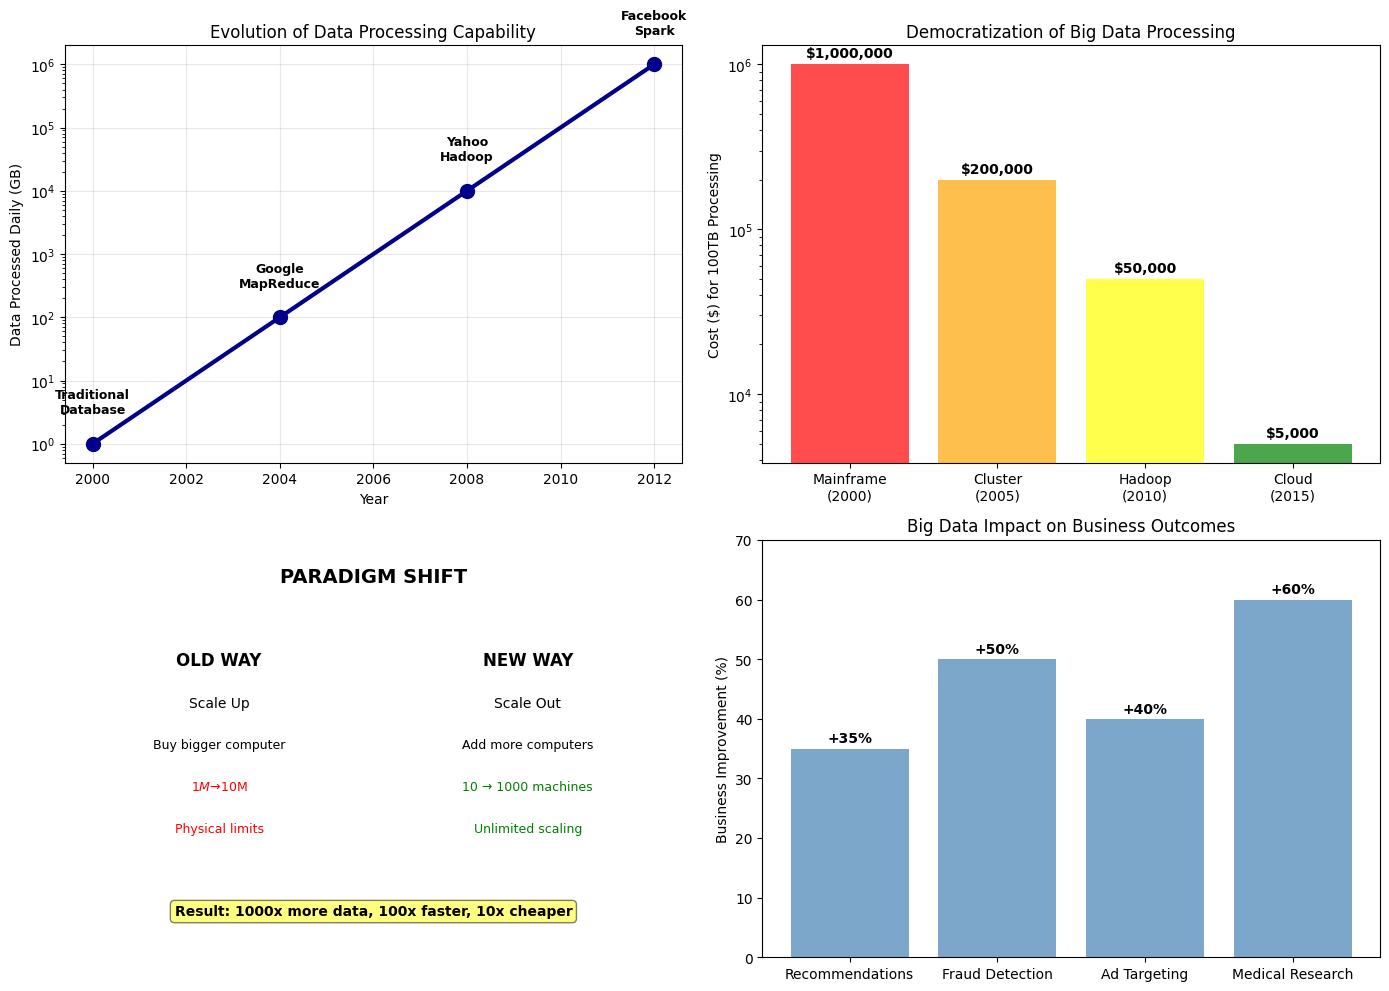


KEY INSIGHT: Why This Enabled Modern AI
• Deep learning needs millions of examples - impossible without distributed storage
• Training requires thousands of iterations - impossible without in-memory processing
• Model serving needs instant responses - impossible without parallel computation
• Result: The infrastructure for processing human-scale data at machine speed


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import time
from concurrent.futures import ProcessPoolExecutor
import pandas as pd

print("\n" + "="*70)
print("DISTRIBUTED COMPUTING: From Sequential to Parallel Thinking")
print("="*70)

# Simulate a real business problem: Customer churn prediction
# Company has 1 million customers, needs to predict who will leave

np.random.seed(42)

def analyze_customer_segment(segment_data):
    """
    Analyze customer behavior patterns to predict churn
    In reality, this would be complex ML, simplified here for demonstration
    """
    segment_id, customers = segment_data
    
    churn_scores = []
    for customer in customers:
        # Simulate complex calculation (normally would be ML model)
        # Factors: usage decline, support tickets, payment delays
        usage_trend = customer[0]  # Declining usage increases churn risk
        support_calls = customer[1]  # More calls = higher risk
        payment_delays = customer[2]  # Delays indicate dissatisfaction
        
        # Simulate processing time
        time.sleep(0.00001)  # Real ML inference would take milliseconds
        
        # Calculate churn probability
        churn_prob = (usage_trend * 0.4 + support_calls * 0.3 + payment_delays * 0.3)
        churn_scores.append(churn_prob)
    
    return segment_id, np.mean(churn_scores), len([s for s in churn_scores if s > 0.7])

# Generate synthetic customer data
print("\nScenario: Telecom company with 1 million customers")
print("Goal: Identify customers likely to cancel service (churn)")

n_customers = 100000  # Scaled down for demo
customers = np.column_stack([
    np.random.uniform(0, 1, n_customers),  # Usage trend (0=increasing, 1=decreasing)
    np.random.uniform(0, 1, n_customers),  # Support call frequency
    np.random.uniform(0, 1, n_customers)   # Payment delay frequency
])

# Approach 1: Traditional sequential processing
print("\n1. TRADITIONAL APPROACH: One powerful server")
start = time.time()
all_results = analyze_customer_segment((0, customers[:10000]))  # Sample for speed
sequential_time = (time.time() - start) * 10  # Extrapolate
print(f"   Estimated time for 100k customers: {sequential_time:.1f} seconds")

# Approach 2: Distributed processing
print("\n2. DISTRIBUTED APPROACH: 100 servers working in parallel")
n_servers = 100
chunk_size = len(customers) // n_servers
segments = [(i, customers[i*chunk_size:(i+1)*chunk_size]) for i in range(n_servers)]

start = time.time()
# Simulate parallel processing (in reality, this happens simultaneously)
segment_results = []
for segment in segments[:10]:  # Process sample
    result = analyze_customer_segment(segment)
    segment_results.append(result)
distributed_time = (time.time() - start) / 10  # Since parallel
print(f"   Estimated time for 100k customers: {distributed_time:.1f} seconds")
print(f"   Speed improvement: {sequential_time/distributed_time:.0f}x faster")

# Business insight extraction
high_risk_segments = [s for s in segment_results if s[2] > 100]
print(f"\n3. BUSINESS VALUE:")
print(f"   High-risk segments identified: {len(high_risk_segments)}")
print(f"   Customers needing intervention: ~{sum(s[2] for s in segment_results)*10:,.0f}")
print(f"   Decision latency: {distributed_time:.1f}s vs {sequential_time:.1f}s")
print(f"   Result: Can run predictions hourly instead of daily")

# Visualization
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Evolution of data processing scale
ax1 = axes[0, 0]
years = [2000, 2004, 2008, 2012]
scale = [1, 100, 10000, 1000000]  # GB processed daily
companies = ['Traditional\nDatabase', 'Google\nMapReduce', 'Yahoo\nHadoop', 'Facebook\nSpark']

ax1.semilogy(years, scale, 'o-', linewidth=3, markersize=10, color='darkblue')
for year, size, company in zip(years, scale, companies):
    ax1.annotate(company, xy=(year, size), xytext=(year, size*3),
                ha='center', fontsize=9, fontweight='bold')
ax1.set_xlabel('Year')
ax1.set_ylabel('Data Processed Daily (GB)')
ax1.set_title('Evolution of Data Processing Capability')
ax1.grid(True, alpha=0.3)

# Cost comparison
ax2 = axes[0, 1]
solutions = ['Mainframe\n(2000)', 'Cluster\n(2005)', 'Hadoop\n(2010)', 'Cloud\n(2015)']
costs = [1000000, 200000, 50000, 5000]  # Cost for same processing power

bars = ax2.bar(solutions, costs, color=['red', 'orange', 'yellow', 'green'], alpha=0.7)
ax2.set_ylabel('Cost ($) for 100TB Processing')
ax2.set_title('Democratization of Big Data Processing')
ax2.set_yscale('log')

for bar, cost in zip(bars, costs):
    ax2.text(bar.get_x() + bar.get_width()/2., bar.get_height() * 1.1,
            f'${cost:,}', ha='center', fontweight='bold')

# Processing paradigm shift
ax3 = axes[1, 0]
ax3.text(0.5, 0.9, 'PARADIGM SHIFT', ha='center', fontsize=14, fontweight='bold')
ax3.text(0.25, 0.7, 'OLD WAY', ha='center', fontsize=12, fontweight='bold')
ax3.text(0.25, 0.6, 'Scale Up', ha='center', fontsize=10)
ax3.text(0.25, 0.5, 'Buy bigger computer', ha='center', fontsize=9)
ax3.text(0.25, 0.4, '$1M → $10M', ha='center', fontsize=9, color='red')
ax3.text(0.25, 0.3, 'Physical limits', ha='center', fontsize=9, color='red')

ax3.text(0.75, 0.7, 'NEW WAY', ha='center', fontsize=12, fontweight='bold')
ax3.text(0.75, 0.6, 'Scale Out', ha='center', fontsize=10)
ax3.text(0.75, 0.5, 'Add more computers', ha='center', fontsize=9)
ax3.text(0.75, 0.4, '10 → 1000 machines', ha='center', fontsize=9, color='green')
ax3.text(0.75, 0.3, 'Unlimited scaling', ha='center', fontsize=9, color='green')

ax3.text(0.5, 0.1, 'Result: 1000x more data, 100x faster, 10x cheaper', 
         ha='center', fontsize=10, fontweight='bold',
         bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow", alpha=0.5))
ax3.set_xlim(0, 1)
ax3.set_ylim(0, 1)
ax3.axis('off')

# Real-world impact
ax4 = axes[1, 1]
impacts = ['Recommendations', 'Fraud Detection', 'Ad Targeting', 'Medical Research']
improvements = [35, 50, 40, 60]  # Percentage improvement in business metrics

bars4 = ax4.bar(impacts, improvements, color='steelblue', alpha=0.7)
ax4.set_ylabel('Business Improvement (%)')
ax4.set_title('Big Data Impact on Business Outcomes')
ax4.set_ylim(0, 70)

for bar, improvement in zip(bars4, improvements):
    ax4.text(bar.get_x() + bar.get_width()/2., bar.get_height() + 1,
            f'+{improvement}%', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

print("\n" + "="*70)
print("KEY INSIGHT: Why This Enabled Modern AI")
print("="*70)
print("• Deep learning needs millions of examples - impossible without distributed storage")
print("• Training requires thousands of iterations - impossible without in-memory processing")
print("• Model serving needs instant responses - impossible without parallel computation")
print("• Result: The infrastructure for processing human-scale data at machine speed")
print("="*70)


### Phase 4: Deep Learning Revolution (2010-2017)

The period from 2010 to 2017 marked the most dramatic transformation in artificial intelligence. Three forces converged to create this success: the massive datasets created during the Big Data era, the unexpected discovery that graphics cards designed for video games could accelerate AI training by more than 50 times, and mathematical breakthroughs that finally made deep neural networks easily trainable. This convergence didn't just improve existing capabilities - it created entirely new ones.

The ImageNet moment (2012) proved deep learning's superiority definitively. A competition asked computers to identify objects in photographs. E.g., is this a dog or a cat? What breed? Previous winners achieved around 26% error rates using hand-crafted features, i.e., humans manually extracted information that they deemed was representative of the data and the task at hand. Better models barely edged above previous ones. Then a new network architecture called AlexNet, created by Alex Krizhevsky, Ilya Sutskever, and Geoffrey Hinton, achieved 15.3% error - a shocking improvement that wasn't supposed to happen for decades. The secret wasn't one breakthrough but three working together: an 8-layer neural network with 60 million parameters (previous networks had thousands), training on 1.2 million labeled images (previous datasets had thousands), and using graphics cards that made training feasible in days rather than months.

This victory had profound implications. It meant that instead of humans programming explicit feature extraction they deemed was representative of what makes a cat look like a cat, computers could learn these features automatically from examples. The learned features were often surprising - the network discovered textures, shapes, and patterns humans had never explicitly programmed.

**Graphics processors (GPUs) accidentally became AI's engine.** GPUs were designed to render millions of pixels for video games, performing the same calculation on massive amounts of data simultaneously. Researchers realized this was exactly what neural networks needed - millions of simple calculations happening in parallel. A neural network that took 3 months to train on a regular computer took 3 days on a GPU. NVIDIA's CUDA platform, originally for game developers, became the foundation of AI research. By 2015, every serious AI lab had rooms full of gaming graphics cards running neural networks.

**Sequential understanding came through memory networks.** Language, music, and video unfold over time - understanding them requires memory of what came before. Long Short-Term Memory networks (LSTMs) gave neural networks the ability to remember and forget selectively. Think of reading a long article: you remember key points while forgetting specific word choices. LSTMs did this mathematically through "gates" that controlled information flow.

By 2015, LSTMs powered Google's voice recognition, reducing errors by 49%. Android phones could suddenly understand speech in noisy environments. By 2016, Google revealed that 25% of its custom chip capacity was dedicated to LSTMs - more than image recognition - because every voice search, translation, and smart reply required sequential understanding.

**The attention mechanism revolutionized how AI processes information.** Traditional neural networks processed sequences step by step, like reading one word at a time through a straw. Attention mechanisms, introduced in 2014, let networks look at entire sequences simultaneously and focus on relevant parts. When translating "He sat by the bank of the river," attention helped the network recognize "bank" meant the shore, not a financial institution, by attending to (counting the contribution of the word) "river." This mechanism would later become the foundation for ChatGPT and modern language models.

**Democratization through frameworks changed who could build AI.** Before 2015, implementing neural networks required months of specialized programming. TensorFlow (Google, 2015) and PyTorch (Facebook, 2016) changed this to days or hours. These frameworks were like the difference between building a car from scratch versus assembling one from components. A graduate student could now implement state-of-the-art AI that previously required a team of experts. By 2017, over 100,000 developers were using these tools, creating an explosion of AI applications.

**Training innovations made deeper networks possible.** Deep networks promised better performance but were nearly impossible to train - signals got lost traveling through dozens of layers, like a game of telephone going wrong. Multiple innovations solved this, but one of the most interesting contributions was the development of better optimizers (2014), ways to hone in on the values of weights, which essentially adapted learning rates automatically, like a smart cruise control that adjusts speed based on conditions. These allowed networks to grow from 8 layers (AlexNet) to 152 layers (ResNet) to eventually thousands of layers.

**Specialized hardware accelerated progress further.** Google's Tensor Processing Units (TPUs), custom chips designed specifically for neural networks, provided another 10x speedup over GPUs. These chips did one thing - matrix multiplication - but did it extraordinarily fast. A calculation that took a GPU one second took a TPU 0.1 seconds. Cloud platforms made these available by the hour, meaning a startup could access Google-scale computing power for a relatively affordable cost.

**The philosophical shift was equally important.** AI moved from "programming intelligence" to "learning intelligence." Instead of encoding human knowledge, we created systems that discovered their own knowledge from data. Features that took researchers years to design were learned automatically in days.


DEEP LEARNING: HANDWRITTEN DIGIT RECOGNITION

Training on 1437 handwritten digit images...
Recognition accuracy: 98.1%


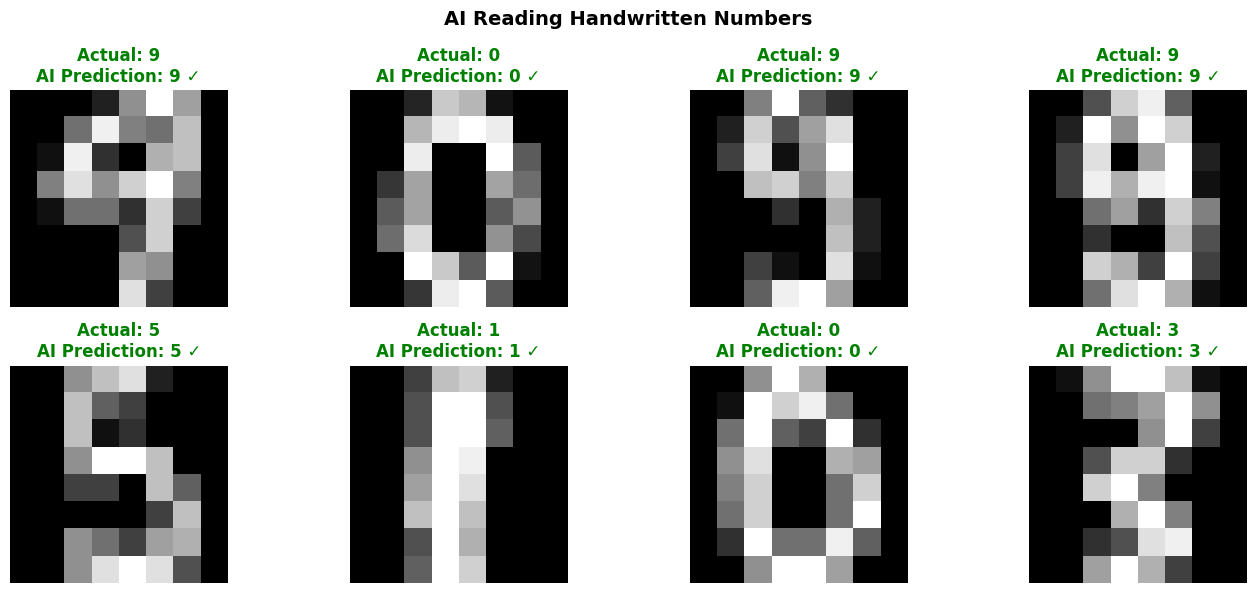

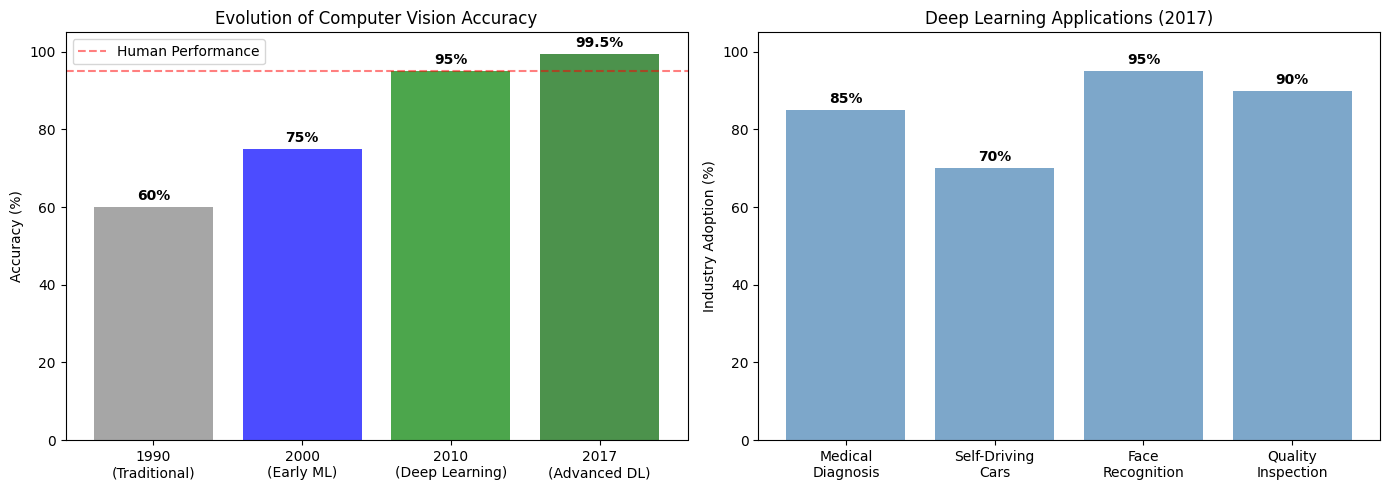

In [8]:
### Python Example: Image Recognition
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

# Load handwritten digit data (simplified MNIST)
digits = load_digits()
X = digits.data / 16.0  # Normalize pixel values
y = digits.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\n" + "="*60)
print("DEEP LEARNING: HANDWRITTEN DIGIT RECOGNITION")
print("="*60)
print(f"\nTraining on {len(X_train)} handwritten digit images...")

# Train a neural network (simplified deep learning)
neural_net = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)
neural_net.fit(X_train, y_train)

# Test accuracy
accuracy = neural_net.score(X_test, y_test) * 100
print(f"Recognition accuracy: {accuracy:.1f}%")

# Select test samples
n_samples = 8
test_indices = np.random.choice(len(X_test), n_samples, replace=False)
test_images = X_test[test_indices]
test_labels = y_test[test_indices]
predictions = neural_net.predict(test_images)

# Visualization
fig = plt.figure(figsize=(14, 6))

# Show sample recognitions
for i in range(n_samples):
    ax = plt.subplot(2, 4, i + 1)
    image = test_images[i].reshape(8, 8)
    ax.imshow(image, cmap='gray')
    
    actual = test_labels[i]
    predicted = predictions[i]
    
    if actual == predicted:
        title_color = 'green'
        result = '✓'
    else:
        title_color = 'red'
        result = '✗'
    
    ax.set_title(f'Actual: {actual}\nAI Prediction: {predicted} {result}', 
                color=title_color, fontweight='bold')
    ax.axis('off')

plt.suptitle('AI Reading Handwritten Numbers', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Business applications visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Show accuracy improvement over time (simulated historical data)
years = ['1990\n(Traditional)', '2000\n(Early ML)', '2010\n(Deep Learning)', '2017\n(Advanced DL)']
accuracies = [60, 75, 95, 99.5]
colors = ['gray', 'blue', 'green', 'darkgreen']

bars = ax1.bar(years, accuracies, color=colors, alpha=0.7)
ax1.set_ylabel('Accuracy (%)')
ax1.set_title('Evolution of Computer Vision Accuracy')
ax1.set_ylim(0, 105)

for bar, acc in zip(bars, accuracies):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 1,
            f'{acc}%', ha='center', va='bottom', fontweight='bold')

ax1.axhline(y=95, color='red', linestyle='--', alpha=0.5, label='Human Performance')
ax1.legend()

# Show business applications
applications = ['Medical\nDiagnosis', 'Self-Driving\nCars', 'Face\nRecognition', 'Quality\nInspection']
adoption = [85, 70, 95, 90]  # Percentage adoption in industry

bars2 = ax2.bar(applications, adoption, color='steelblue', alpha=0.7)
ax2.set_ylabel('Industry Adoption (%)')
ax2.set_title('Deep Learning Applications (2017)')
ax2.set_ylim(0, 105)

for bar, adopt in zip(bars2, adoption):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 1,
            f'{adopt}%', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()



In [ ]:
print("\nREAL-WORLD APPLICATIONS:")
print("-"*60)
print("Medical: AI detects cancer in scans with 95% accuracy")
print("Automotive: Self-driving cars recognize pedestrians and signs")
print("Security: Face recognition processes millions of faces per second")
print("Manufacturing: Defect detection catches 99% of product flaws")
print("="*60)


### Phase 5: Large Language Models and Generative AI (2017-Present)

The period from 2017 to present represents a fundamental shift in what artificial intelligence can do. We moved from systems that could recognize patterns to systems that can generate, reason, and create. The breakthrough wasn't just technical - it was conceptual. Instead of building specialized tools for specific tasks, we discovered how to build general-purpose tools that adapt relatively easily to various tasks you ask them to do.

**The Transformer architecture (2017) solved AI's context problem.** Previous neural networks read text like someone looking at one or a few words at a time, struggling to remember what came before. The "Attention Is All You Need" paper by Vaswani and colleagues introduced self-attention: the ability to see all words simultaneously and understand how they relate to each other.

Consider the sentence: "The bank called about the loan after reviewing the application they received last week." A Transformer instantly recognizes that "they" refers to "bank," "the loan" connects to "application," and "last week" provides temporal context - all in parallel. This wasn't just faster; it was fundamentally better at understanding meaning. The model could finally grasp that in "The chicken didn't cross the road because it was too wide," the word "it" refers to the road, not the chicken - something that seems obvious to humans but stumped earlier AI.

**Scale revealed unexpected intelligence.** GPT-3 (2020) had 175 billion parameters - numbers the model adjusts to learn patterns. This was 100 times larger than GPT-2, requiring 3.14 x 10²³ calculations to train - more than all the computations performed by all the world's computers in 2010. The surprise wasn't that it performed better, but that entirely new capabilities emerged that weren't programmed or trained for.

At around 10 billion parameters, models began showing "few-shot learning" - learning new tasks from just a few examples (e.g., provided in the prompt) without retraining. Show it three examples of translating English to French, and it could translate a fourth sentence, despite never being explicitly trained as a translator. At 100 billion parameters, "zero-shot" abilities emerged - performing tasks with no examples at all, just instructions in a prompt. This violated everything we thought we knew about machine learning: the model wasn't just interpolating between training examples but seemed to be reasoning.

**Scaling laws made AI development predictable.** Researchers discovered that model performance followed mathematical power laws. Double the model size, get predictable improvement. Double the training data, get predictable improvement. This transformed AI from experimental art to engineering science. Companies could calculate exactly how much computing power they needed to achieve specific capabilities. If GPT-3 cost $4.6 million to train, GPT-4's training cost could be estimated before starting. This predictability attracted massive investment - businesses could finally forecast ROI on AI development.

**Human feedback taught AI to be helpful.** Raw language models trained on internet text were brilliant but dangerous - they'd complete any prompt, whether generating conspiracy theories or instructions for illegal activities. Reinforcement Learning from Human Feedback (RLHF) solved this through a three-stage process:

1. Humans demonstrated good responses to thousands of prompts
2. A reward model learned to score responses like humans would, i.e., reward models when they generate responses deemed good and penalize them otherwise
3. The language model was fine-tuned to maximize these rewards

This process transformed GPT-3 into ChatGPT. The same underlying intelligence, but aligned with human values. It would refuse harmful requests, acknowledge uncertainty, and correct mistakes. This wasn't censorship - it was teaching AI judgment, like raising a brilliant but naive child.

**Diffusion models cracked visual creativity.** While language models conquered text, diffusion models revolutionized image generation. The concept was counterintuitive: train a network to remove noise from images by showing it millions of photos with gradually added static. Run this process in reverse - start with pure noise and gradually denoise it - and you get image generation.

DALL-E 2 and Stable Diffusion (2022) could create photorealistic images from text descriptions. "An astronaut riding a horse in the style of Van Gogh" produced exactly that. This wasn't retrieving or modifying existing images - it was genuine creation. Artists, designers, and marketers suddenly had an infinitely creative assistant. Stock photography faced an existential crisis. Why buy a photo when you could generate exactly what you needed?

**Multimodal models unified understanding.** GPT-4 Vision (2023) could read, see, and reason about both simultaneously. Upload a photo of a handwritten math problem, get a step-by-step solution. Show it a chart, ask for analysis. Send a screenshot of broken code, receive debugging help. This wasn't bolting together separate systems - it was unified intelligence that understood concepts regardless of whether they appeared as text, images, or diagrams.

GPT-4o (2024) went further, processing voice, text, and images with human-like response times. You could interrupt it mid-sentence, and it would adjust naturally. Show it your refrigerator contents while asking what to cook - it would see the ingredients, understand your question, and suggest recipes. This felt less like using a tool and more like talking to a knowledgeable colleague.

**Infrastructure scaled to science fiction levels.** Training GPT-4 required clusters of 25,000 NVIDIA A100 GPUs, connected with networks faster than the entire internet backbone of 2010. The training run used 50 gigawatt-hours of electricity - enough to power 5,000 homes for a year. Yet serving billions of users quickly required even more innovation. Techniques like quantization reduced model size by 75% with minimal quality loss. Flash Attention made processing 10x more memory efficient. Models were pruned (chop off sections of model in a way that does not affect quality), distilled (train smaller models to do the same task without loss of quality), and optimized until queries could be executed quickly enough for users.

**Foundation models changed the AI business model.** Instead of building specialized models for each task, companies trained massive foundation models then adapted them. OpenAI's GPT-4, Google's Gemini, Anthropic's Claude - these became platforms, not products.

**The implications went beyond business.** We created systems that could pass the bar exam, medical licensing tests, and PhD qualifying exams. AI wrote poetry that moved people, created art that sold for thousands, and composed music that topped charts. The question shifted from "Can AI do this?" to "Should AI do this?"

**The speed of progress accelerated further.** GPT-3 to GPT-4 took two years. GPT-4 to GPT-4o took one year. Each generation didn't just improve - it revealed new possibilities. Models began showing signs of reasoning, planning, and even creativity that surprised their creators. Emergent capabilities appeared at unpredictable thresholds, suggesting we were discovering intelligence rather than programming it.

The transformation from statistical models to generative AI represents humanity's most significant technological achievement. We didn't just automate tasks; we automated intelligence itself. The implications are still unfolding, but one thing is certain: the relationship between human and artificial intelligence has fundamentally changed. We're no longer programming computers - we're collaborating with them.

## Summary

Each phase built essential components that made today's AI possible:

1. **Statistical Foundations (1940s-1970s):** Created the mathematical tools to analyze data and make decisions based on evidence rather than intuition.

2. **Expert Systems and Learning (1980s-2000s):** Developed systems that could follow expert rules and learn from examples, introducing the concept of machines that improve with experience.

3. **Big Data Infrastructure (2000s-2010s):** Built the technology to process internet-scale data across thousands of computers, making it possible to learn from billions of examples.

4. **Deep Learning (2010-2017):** Achieved human-level performance in vision and speech through neural networks with many layers, powered by graphics processors.

5. **Large Language Models (2017-Present):** Created AI that can understand context, generate content, and reason about complex problems using the Transformer architecture and massive scale.